In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv(r"F:\Data_Science_Jupyter_Files\teleCust1000t.csv")

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### Data Visualization and Analysis

In [6]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

In [14]:
# Separate the data into the input data set and the target data set.
X = df.drop("custcat", axis=1)
y = df["custcat"]

### Normalize Data

In [16]:
X_norm = StandardScaler().fit_transform(X)

### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

### KNN Classification

#### Training

In [20]:
# Initially, we may start by using a small value as the value of k, say k = 3.
k = 3
#Train Model and Predict 
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train, y_train)

#### Predicting

In [21]:
yhat = knn_model.predict(X_test)

#### Accuracy evaluation

In [22]:
# It calculates how closely the actual labels and predicted labels are matched in the test set.

print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315


In [24]:
# build the model again, but this time with k=6

knn_classifier_ = KNeighborsClassifier(n_neighbors = 6)
knn_model_ = knn_classifier_.fit(X_train, y_train)

y_hat = knn_model.predict(X_test)

print("Test set Accuracy: ", accuracy_score(y_test, y_hat))

Test set Accuracy:  0.31


#### Choosing the correct value of k

In [25]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1, Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(yhat.shape[0])

#### Plot the model accuracy for a different number of neighbors.

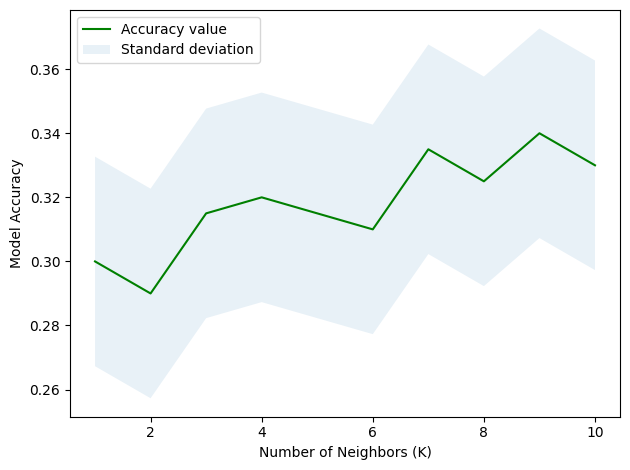

In [29]:
# Now, we can plot the model accuracy and the standard deviation to identify the model with the most suited value of k.

plt.plot(range(1, Ks+1), acc, "g", label="Accuracy value")
plt.fill_between(range(1, Ks+1), acc-std_acc, acc+std_acc, alpha=0.10, label="Standard deviation")
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Model Accuracy')
plt.legend()
# Alternate way : plt.legend(('Accuracy value', 'Standard Deviation'))
plt.tight_layout()
plt.show()